# Clean and Analyze Employee Exit Surveys
In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.  
The datasets can be found here:  
* [TAFE exit survey](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)  
* [DETE exit survey](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)  

We're playing the role of a data analyst and pretending our stakeholders want to know the following:  
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatistfaction? What about employees who have been there longer?  
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below is a preview of a couple columns we'll work with from the DETE exit survey:  
* `ID`: An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person begin employment with the DETE

Below is a preview of a couple columns we'll work with from the TAFE exit survey:
* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
%matplotlib inline
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')

In [2]:
# Explore the datasets
print('DETE EXIT SURVEY:')
dete_survey.info()
print('------------------------------------------')
dete_survey.head()

DETE EXIT SURVEY:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sect

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
# Explore the datasets
print('TAFE EXIT SURVEY:')
tafe_survey.info()
print('------------------------------------------')
tafe_survey.head()

TAFE EXIT SURVEY:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Data Cleaning

### Identify Missing Values and Drop Unnecessary Columns

We noticed that:
* The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as 'Nan'
* Both datasets contain many columns that we don't need to complete our analysis
* The column names are different in each dataset even though they represent the same information
* Some columns indicate that an employee resigned because of dissatisfaction

We'll handle these issues one by one. First, we will modify the read_csv function so that it recognize 'Not Stated' as missing value. Then, we'll drop the columns that we don't need.


In [4]:
# Add option na_values to recognize missing values
dete_survey=pd.read_csv('dete_survey.csv', na_values='Not Stated')

# Drop columns we don't need
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
# Drop columns we don't need
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Clean Column Names

Next, we'll rename some of the columns so that we can combine the two datasets for our analysis. Below are some of the columns we'd like to use:

| dete_survey | tafe_survey | Definition |
|:-|:-|:-|
| ID | Record ID | An id used to identify the participant of the survey |
| SeparationType | Reason for ceasing employee | The reason why the participant's employment ended |
| Cease Date | CESSATION YEAR | The year or month the participant's employment ended |
| DETE Start Date |  | The year the participant began employment with the DETE |
|  | LengthofServiceOverall. Overall Length of Service at Institute (in years) | The length of the person's employment (in years) |
| Age | CurrentAge. Current Age. | The age of the participant |
| Gender | Gender. What is your Gender?  | The gender of the participant |

In [6]:
# Rename the columns
dete_survey_updated.columns=dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [7]:
# Rename the columns 
col_names={'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated.rename(col_names, inplace=True, axis=1)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

### Filter the Data

Now, since we want to know if the cause of resignation is indeed dissatisfaction, we should only focus on respondants who resigned. It means their separation type must contains the string 'Resignation'.
Below are the values we can find in the `separationtype` column.

In [8]:
# Unique values in the column 'separationtype'
print('Unique values in \'separationtype\' of dete_survey_updated:')
print(dete_survey_updated['separationtype'].value_counts())
print('\n')
print('------------------------------------')
print('Unique values in \'separationtype\' of tafe_survey_updated:')
print(tafe_survey_updated['separationtype'].value_counts())

Unique values in 'separationtype' of dete_survey_updated:
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


------------------------------------
Unique values in 'separationtype' of tafe_survey_updated:
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [9]:
# Select only the data for survey respondents who have a `Resignation` separation type
dete_resignation=dete_survey_updated.copy()
tafe_resignation=tafe_survey_updated.copy()
dete_resignation=dete_resignation.loc[dete_resignation['separationtype'].str.contains('Resignation')]
tafe_resignation=tafe_resignation.loc[tafe_resignation['separationtype']=='Resignation']
print('Unique values in \'separationtype\' of dete_resignation:')
print(dete_resignation['separationtype'].value_counts())
print('\n')
print('------------------------------------')
print('Unique values in \'separationtype\' of tafe_resignation:')
print(tafe_resignation['separationtype'].value_counts())

Unique values in 'separationtype' of dete_resignation:
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64


------------------------------------
Unique values in 'separationtype' of tafe_resignation:
Resignation    340
Name: separationtype, dtype: int64


### Verify the Data

Next, we'll explore the columns `cease_date` and `dete_start_date` to make sure that the values make sense.

In [10]:
# Extract the year in 'cease_date'
dete_resignation['cease_date']=dete_resignation['cease_date'].str[-4:]
dete_resignation['cease_date']=dete_resignation['cease_date'].astype(float)

# Check the values of 'cease_date'
dete_resignation['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [11]:
# Check the values of 'dete_start_date'
dete_resignation['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [12]:
# Check the values of 'cease_date' in tafe_resignation
tafe_resignation['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

### Calculate the years of service
Notice that `tafe_resignation` dataset already has the `institute_service`. Now we need to create one in `dete_resignation`

In [13]:
# Create `institute_service` in dete_resignation
dete_resignation['institute_service']=dete_resignation['cease_date'] - dete_resignation['dete_start_date']
dete_resignation['institute_service'].value_counts().sort_values(ascending=False)

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
8.0      8
13.0     8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
18.0     5
16.0     5
23.0     4
24.0     4
11.0     4
39.0     3
19.0     3
21.0     3
32.0     3
30.0     2
28.0     2
26.0     2
25.0     2
36.0     2
41.0     1
34.0     1
38.0     1
35.0     1
49.0     1
27.0     1
42.0     1
33.0     1
29.0     1
31.0     1
Name: institute_service, dtype: int64

### Identify Dissatisfied Employees
Below are the columns we'll use to categorize employees as "dissatisfied". If the employee indicated any of these factors caused them to resign, we'll mark them as 'dissatisfied' in a new  column.

**1. tafe_resignation:**
    * Contributing Factors. Dissatisfaction
    * Contributing Factors. Job Dissatisfaction
**2. dete_resignation:**
    * job_dissatisfaction
    * dissatisfaction_with_the_department
    * physical_work_environment
    * lack_of_recognition
    * lack_of_job_security
    * work_location
    * employment_conditions
    * work_life_balance
    * workload

In [14]:
# Check the values
dete_resignation[['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']].describe()

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
count,311,311,311,311,311,311,311,311,311
unique,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False
freq,270,282,305,278,297,293,288,243,284


In [15]:
# Check the values
tafe_resignation[['Contributing Factors. Dissatisfaction',
                        'Contributing Factors. Job Dissatisfaction']].describe()

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
count,332,332
unique,2,2
top,-,-
freq,277,270


First, we need to convert the values in the 2 columns of tafe_resignation to either `True`, `False` or `NaN`.

In [16]:
# Convert the values in 'Contributing Factors. Dissatisfaction' 
# and 'Contributing Factors. Job Dissatisfaction'
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

tafe_resignation['dissatisfied'] = tafe_resignation[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignation_up = tafe_resignation.copy()

In [17]:
# Create a new column indicating if the former employees resigned because of
# dissatisfaction
dete_resignation['dissatisfied']=dete_resignation[['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']].any(axis=1, skipna=False)
dete_resignation_up=dete_resignation.copy()

In [18]:
# Check the values in 'dissatisfied'
tafe_resignation_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [19]:
# Check the values in 'dissatisfied'
dete_resignation_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

### Clean the `age` Column

In [20]:
# Unique values in the column 'age'
print("Unique values in column 'age' of DETE Survey:")
print(dete_resignation_up['age'].value_counts(dropna=False))
print("-----------------------------------------------")
print("Unique values in column 'age' of TAFE Survey:")
print(tafe_resignation_up['age'].value_counts(dropna=False))

Unique values in column 'age' of DETE Survey:
41-45            48
46-50            42
36-40            41
26-30            35
51-55            32
31-35            29
21-25            29
56-60            26
61 or older      23
NaN               5
20 or younger     1
Name: age, dtype: int64
-----------------------------------------------
Unique values in column 'age' of TAFE Survey:
NaN              50
41  45           45
46  50           39
51-55            39
21  25           33
36  40           32
31  35           32
26  30           32
56 or older      29
20 or younger     9
Name: age, dtype: int64


DETE Survey has category `61 or older` while TAFE Survey doesn't. We can regroup it and add a '-' to the ranges in TAFE Survey to standardize the values. 

In [21]:
# Add '-' in column 'age' of TAFE Survey
tafe_resignation_up['age']=tafe_resignation_up['age'].str.replace('  ','-')

# Regroup '61 or older' and '56-60'
dete_resignation_up['age']=dete_resignation_up['age'].str.replace('61 or older','56 or older').str.replace('56-60','56 or older')

In [22]:
# Unique values in the column 'age'
print("Unique values in column 'age' of DETE Survey:")
print(dete_resignation_up['age'].value_counts(dropna=False).sort_index())
print("-----------------------------------------------")
print("Unique values in column 'age' of TAFE Survey:")
print(tafe_resignation_up['age'].value_counts(dropna=False).sort_index())

Unique values in column 'age' of DETE Survey:
20 or younger     1
21-25            29
26-30            35
31-35            29
36-40            41
41-45            48
46-50            42
51-55            32
56 or older      49
NaN               5
Name: age, dtype: int64
-----------------------------------------------
Unique values in column 'age' of TAFE Survey:
20 or younger     9
21-25            33
26-30            32
31-35            32
36-40            32
41-45            45
46-50            39
51-55            39
56 or older      29
NaN              50
Name: age, dtype: int64


### Clean the Service Column of TAFE survey
Let's first take a look at the column `institute_service`.

In [23]:
# Check the values of `institute_service` in TAFE survey
tafe_resignation_up['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

Remember we have calculated the years of service in `dete_resignation` dataset and converted the values into floats. However, in the TAFE survey, the duration of service was converted into categories.  
We need to standardize the values for later use.

In [24]:
# Convert the string to float
tafe_resignation_up['institute_service']=tafe_resignation['institute_service'].str.replace('Less than 1 year','0-1').str.replace('More than 20 years','20-20')
pattern=r'[0-9]?[0-9]?-?(?P<year>\d+)'
yos=tafe_resignation_up['institute_service'].str.extractall(pattern).reset_index(level=[1])
tafe_resignation_up['institute_service']=yos['year'].astype(float)

In [25]:
# Verify the results
tafe_resignation_up['institute_service'].value_counts(dropna=False)

1.0     73
2.0     64
4.0     63
NaN     50
20.0    36
6.0     33
10.0    21
Name: institute_service, dtype: int64

### Combine the two datasets
Now we're ready to combine our datasets.

In [26]:
# Create a column to distinguish the two 
dete_resignation_up['institute']='DETE'
tafe_resignation_up['institute']='TAFE'

# Combine the dataframes
combined=pd.concat([dete_resignation_up,tafe_resignation_up], axis=0)

# Keep the columns we need by dropping those containing less than 500 non-null values
combined_updated=combined.dropna(axis=1, thresh=500)

combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    float64
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(3), object(7)
memory usage: 55.9+ KB


### Categorize the Service Column
According to [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), we should take into account the employees' career stage instead of their age. For that reason, we'll categorize their years of service. The four key career stages are:
* New (3 years or less at a company)
* Experienced (3 - 6 years at a company)
* Established (7 - 10 years at a company)
* Veteran (11 years or more at a company)

In [27]:
# Categorize the Service Column
def categorize_service(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return "New"
    elif 3 <= val <= 6:
        return "Experienced"
    elif 7 <= val <= 10:
        return "Established"
    elif val >= 11:
        return "Veteran"

final=combined_updated.copy()
final['service_cat']=combined_updated['institute_service'].apply(categorize_service)
final['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

We have created a new column `service_cat` that contains the four career stages.

### Handle Missing Values in `dissatisfied` column

Since this is our response variable, we need to be careful with the missing values. During this step, we'll fill them in before proceeding to any further analysis.

In [28]:
# Use value_counts() to check the values in `dissatisfied` column
final['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

We have 8 missing values in this column. Because `dissatisfied` consists of Boolean values, we can replace the missing values with the value that occurs most frequently, which is 'False'

In [29]:
# Use fillna() to fill the missing values with the one that occurs most frequently
final['dissatisfied']=final['dissatisfied'].fillna(False)
final['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

## Analyze the Surveys
To answer our question from the beginning of this project, we can do a simple analysis to see the percentage of dissatisfied employees in each `service_cat` group.  

The questions to be answered were:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatistfaction? What about employees who have been there longer?  
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


### Career Stage and Dissatisfaction

In [30]:
# Build a pivot table to calculate the percentage of dissatisfied employees in each group
pvt=final.pivot_table(values='dissatisfied', 
                  index='service_cat')
pvt.reset_index(inplace=True)
pvt=pvt.iloc[[2,1,0,3]]
pvt

,service_cat,dissatisfied
2,New,0.295337
1,Experienced,0.343023
0,Established,0.516129
3,Veteran,0.485294


Method `df.pivot_table()` treats Boolean values as integers, so a `True` is considered to be `1` and a `False` is considered to be `0`. Also, since the default aggregation function of `df.pivot_table()` is the mean, the result we got from it is actually the percent of dissatisfied employees in each career stage.

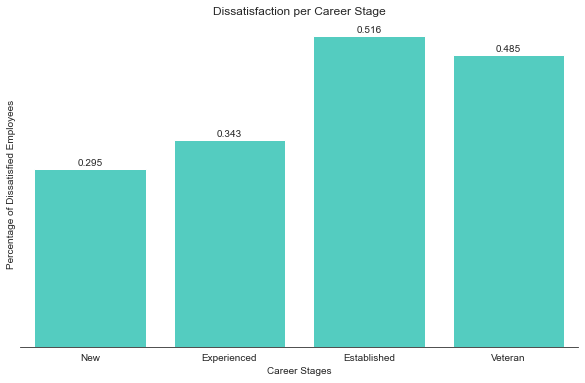

In [31]:
# Visualize the results
plt.figure(figsize=(10,6))
sns.set_style('white')
splt= sns.barplot(x='service_cat', y='dissatisfied',
                 data=pvt, color='turquoise')
plt.yticks([])
plt.xlabel('Career Stages')
plt.ylabel('Percentage of Dissatisfied Employees')
plt.title('Dissatisfaction per Career Stage')

for loc in ['left','right','top']:
    plt.gca().spines[loc].set_visible(False)
for p in splt.patches:
    splt.annotate(format(p.get_height(),'.3f'),
                  (p.get_x()+p.get_width()/2,p.get_height()+0.01),
                  ha='center', 
                  va='center')

From this bar plot, we see that the New and Experienced employees show less dissatisfaction than those who have stayed with the company for more than 7 years. Even though the number of new employees who have resigned are higher than that of other categories, they are less likely to quit the job because of dissatisfaction. 

### Age and Dissatisfaction

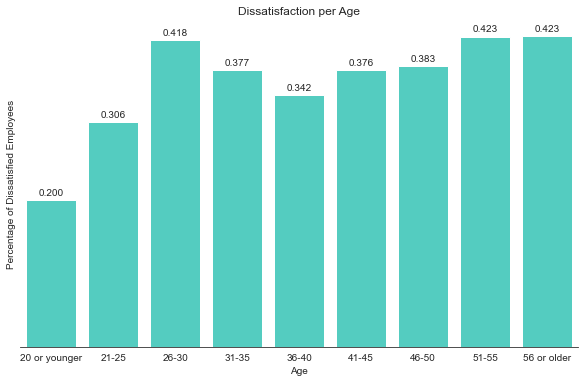

In [32]:
# Pivot table
pvt_age=final.pivot_table(values='dissatisfied', index='age').reset_index()

# Visualize the results
plt.figure(figsize=(10,6))
sns.set_style('white')
splt= sns.barplot(x='age', y='dissatisfied',
                 data=pvt_age, color='turquoise')
plt.yticks([])
plt.xlabel('Age')
plt.ylabel('Percentage of Dissatisfied Employees')
plt.title('Dissatisfaction per Age')

for loc in ['left','right','top']:
    plt.gca().spines[loc].set_visible(False)
for p in splt.patches:
    splt.annotate(format(p.get_height(),'.3f'),
                  (p.get_x()+p.get_width()/2,p.get_height()+0.01),
                  ha='center', 
                  va='center')

This plot shows that people in the range of 26-30 and above 50 years old are more likely to resign due to dissatisfaction. There are other factors that caused a young employee to resign. In fact, overall, the percentage of dissatisfied employees are not even high. Dissatisfaction is not the only reason for resignation.

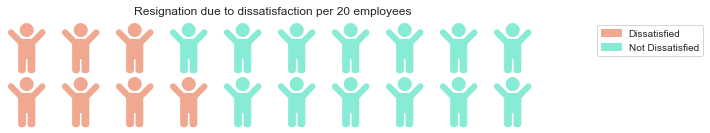

In [33]:
# Number of dissatisfied employees
dissatisfied=final['dissatisfied'].value_counts().reset_index()
dissatisfied.index=['Not Dissatisfied', 'Dissatisfied']
dissatisfied.sort_index(inplace=True)

# Visualize the results
plt.figure(
    figsize=(10,6),
    FigureClass=Waffle,
    rows=2,
    columns=10,
    values=dissatisfied.to_dict()['dissatisfied'],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
    icons='child',
    font_size=50,
    title={'label': 'Resignation due to dissatisfaction per 20 employees', 'loc': 'center'},
    colors=['#f0a890','#88ebd5'])
plt.show()

According to the result, there are 7 out of 20 employees resigned because of dissatisfaction.

## Conclusion

During this project, we got to clean the data from two employee exit survey. We also did some analysis to answer to these questions:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatistfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

From the results, we can conclude that:
* In comparison to those with longer tenure, the employees who stayed in the company for a shorter period of time are less likely to resign due to some kind of dissatisfaction.
* People in the range of 26-30 and above 50 years old are more likely to resign due to dissatisfaction.
* Dissatisfaction is not the only reason for resignation.